In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis de la Consistencia entre Productos y Familias

**Objetivo:**

Asegurar que los productos estén correctamente categorizados para facilitar la búsqueda y el filtrado, tanto a nivel de categoría, subcategoría y familia. Esto es crucial para una experiencia de usuario óptima y un funcionamiento eficiente del motor de búsqueda.

**Hallazgos Principales:**

Se identificaron dos tipos principales de no correspondencia entre productos y familias:

*   **Producto mal categorizado:** 15 casos.
*   **Descripción genérica:** 1 caso.

La mayoría de las no correspondencias se deben a una mala categorización de los productos.

**Metodología:**

1.  **Modelo de IA:** Se utilizó el modelo "gemini-2.0-flash-exp" de Google.

2.  **Prompt:** Se diseñó el siguiente prompt para evaluar la relación entre productos y familias:

    ```
    ¿La siguiente familia se corresponde con la descripción del producto?

    Producto: [name]
    Familia: [family]

    Responde solo con "si" o "no".
    ```

3.  **Validación:** Los resultados de la IA fueron validados de forma aleatoria para asegurar su precisión.

4.  **Resultados Cuantitativos:**

    *   De un total de 439 productos analizados, se encontraron 16 no correspondencias (3.64%).
    *   Si bien este porcentaje puede parecer bajo, es importante considerar que la empresa maneja miles de productos, por lo que incluso un pequeño porcentaje de no correspondencias puede tener un impacto significativo.

**Consideraciones Adicionales:**

*   **Profundización del Análisis:** Sería posible realizar un análisis más profundo si se dispusiera del siguiente nivel de familia (subcategoría), que no está disponible en la vista individual del producto. Esto permitiría identificar inconsistencias a un nivel más granular y ofrecer recomendaciones más específicas.

**Recomendaciones:**

*   **Revisión y Corrección:** Se recomienda revisar y corregir las 16 no correspondencias identificadas, priorizando los casos de productos mal categorizados.
*   **Análisis de Causa Raíz:** Realizar un análisis de causa raíz para determinar por qué se producen estas no correspondencias. ¿Se deben a errores humanos, falta de claridad en las definiciones de familias o problemas en el sistema de catalogación?
*   **Mejora Continua:** Implementar medidas de control de calidad para prevenir futuras no correspondencias. Esto podría incluir la revisión de los procesos de catalogación, la capacitación del personal o la mejora de las herramientas de catalogación.

**Conclusiones:**

Si bien el porcentaje de no correspondencias encontradas es relativamente bajo, es crucial abordar estas inconsistencias para garantizar que los clientes online puedan encontrar fácilmente los productos que buscan y que la empresa tenga una visión precisa de su catálogo.

In [38]:
df = pd.read_csv(r"..\data\transformed\enrichment\enrichment_products.csv")

In [23]:
df[df['relation_batch']==False][['name', 'relation_batch', 'family']]

,name,relation_batch,family
1,Sombrilla De Playa Doo Australia Uv+30,False,Toallas de Playa
36,Sun Bum Lip Balm SPF 30 Mango,False,Cuidado del rostro
76,Juguete Set Balde Playa Sapo,False,Inflables y juegos para piscina
110,Colchoneta Candy Lounge,False,Fitness
113,Piscina Estructural Jacuzzi Lay-Z-Spa 1.80m Ba...,False,Piscinas Inflables
115,Piscina Inflable Familiar Rectangular,False,Fitness
133,Cartucho de Filtro 2574 Litros Bestway,False,Juegos de exterior
158,Polo Niña Manga Corta Doo Australia,False,Moda Mujer
209,Sandalias Hombre Tides 2.0 Classic Blue,False,Mochilas Escolares
211,Sandalias Hombre Tides 2.0 Print Brown,False,Mochilas Escolares


In [20]:
unrelated_products = df[df['relation_batch']==False]
print(len(unrelated_products))
unrelated_products_by_family = unrelated_products.groupby(by="family", as_index=False)\
    .agg(
        total_products= ("name", "count")
    ).sort_values(by="total_products", ascending=False)
unrelated_products_by_family

16


,family,total_products
2,Fitness,4
5,Mochilas Escolares,3
6,Moda Mujer,2
1,Cuidado del rostro,2
0,Cuidado del cuerpo,1
4,Juegos de exterior,1
3,Inflables y juegos para piscina,1
7,Piscinas Inflables,1
8,Toallas de Playa,1


## Análisis de Productos Duplicados

**Objetivo:**

Identificar y analizar productos duplicados en el catálogo.

**Hallazgos Principales:**

Se encontraron 173 filas de productos duplicados, algunos de ellos repetidos hasta 3 veces. La familia con mayor concentración de duplicados es "Moda Mujer", seguida por "Zapatos Mujer", "Cuidado del rostro", "Menaje Comedor" y "Zapatos Hombre".

**Metodología:**

1.  **Identificación de Duplicados:**

    *   Se identificaron productos duplicados mediante la agrupación por `url_product` y `codigo_producto`. Se considera que dos productos son duplicados si comparten mínimamente la misma URL y código de producto.

2.  **Análisis por Familia:**

    *   Se analizó la distribución de productos duplicados en diferentes familias para identificar aquellas con mayor concentración de duplicados.

**Análisis de Resultados:**

1.  **Estadísticas Descriptivas:**

    *   Se encontraron un total de 173 filas de productos duplicados.
    *   La mayoría de los duplicados (26.5% - 46) se concentran  en la familia "Moda Mujer".

2.  **Visualización:**

    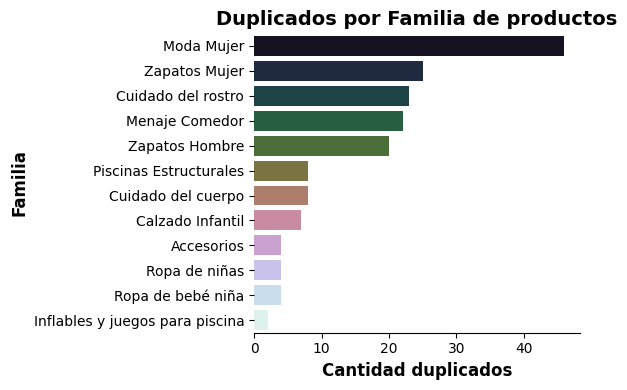

**Consideraciones Adicionales:**

*   **Posible Estrategia de Gancho:** Se sospecha que la alta concentración de duplicados en "Moda Mujer" podría ser una estrategia de gancho. Sin embargo, esta hipótesis requiere una investigación más profunda.
*   **Percepción del Cliente:** Se presume que la mayoría de los clientes no se percatan fácilmente de esta duplicación, ya que los productos tienen los mismos precios y demás datos. No obstante, es importante evaluar si esta práctica podría generar confusión o frustración en algunos casos.

**Recomendaciones:**

1.  **Análisis en Profundidad:**

    *   **Impacto en búsqueda:** Analizar si los duplicados dificultan la búsqueda, confunden al cliente.

2.  **Acciones Concretas:**

    *   **Gestión de Duplicados Intencionales:** Decidir cómo gestionar los duplicados intencionales manteniendo un máximo de duplicados intencionales por item en búsquedas por temporadas.


**Conclusiones:**

La presencia de duplicados, especialmente en la familia "Moda Mujer", plantea interrogantes sobre su origen y su impacto potencial en clientes y la empresa. Se recomienda un análisis más profundo para determinar si se trata de una estrategia intencional o un error, y para definir las mejores acciones para corregir y prevenir duplicados en el futuro.

In [39]:
df_duplicates = pd.read_csv(r"..\data\transformed\duplicates\duplicated_products.csv")

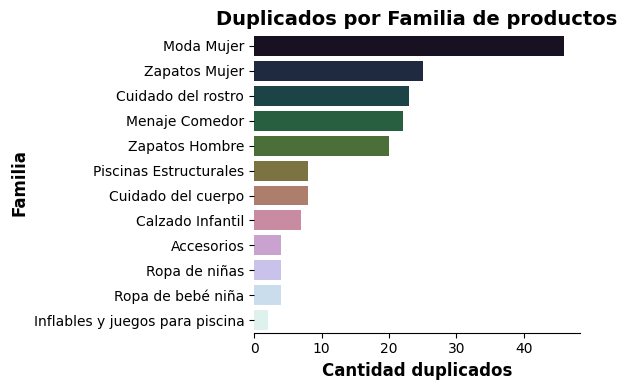

In [ ]:
duplicated_by_family = df_duplicates.groupby(by=["family"], as_index=False)\
    .agg(
        count_products = ("family","count")
    ).sort_values(by="count_products", ascending=False).reset_index(drop=True)
plt.figure(figsize=(6,4))

sns.barplot(data=duplicated_by_family, y='family', x='count_products', hue="family", palette="cubehelix")
plt.xlabel('Cantidad duplicados', fontsize=12, fontweight='semibold')
plt.ylabel('Familia', fontsize=12, fontweight='semibold')
plt.title('Duplicados por Familia de productos', fontsize=14, fontweight='bold')

sns.despine(left=True)

plt.tight_layout() 
plt.show()

In [52]:
duplicated_by_name = df_duplicates.groupby(by=["url_product", "name", "normal_price", "internet_price"], as_index=False)\
    .agg(
        count = ("name","count"),
        diff = ("price_diff_%", "first"),
        
    ).sort_values(by="count", ascending=False)
duplicated_by_name

,url_product,name,normal_price,internet_price,count,diff
15,https://www.falabella.com.pe/falabella-pe/prod...,Calzón De Bikini Mujer Womens Secret,99.9,59.89,3,40.050050
8,https://www.falabella.com.pe/falabella-pe/prod...,Uriage Bariésun Fluido Mat SPF50+ 50ml - Bloqu...,109.9,82.40,3,25.022748
14,https://www.falabella.com.pe/falabella-pe/prod...,Ropa De Baño Mujer Womens Secret,269.9,139.90,3,48.165987
11,https://www.falabella.com.pe/falabella-pe/prod...,Esthederm Fotoprotector Photo Reverse Aclarant...,229.0,229.00,3,0.000000
27,https://www.falabella.com.pe/falabella-pe/prod...,Fp Isdin Fw Magic Glow Spf30,124.9,104.90,3,16.012810
...,...,...,...,...,...,...
75,https://www.falabella.com.pe/falabella-pe/prod...,Traje De Baño Bebé Niña Yamp,59.9,29.89,2,50.100167
77,https://www.falabella.com.pe/falabella-pe/prod...,Sandalias Doo Australia Negro Para Hombre,59.9,19.89,2,66.794658
78,https://www.falabella.com.pe/falabella-pe/prod...,Sandalias Hombre Doo Australia Fliparty,69.9,19.89,2,71.545064
80,https://www.falabella.com.pe/falabella-pe/prod...,Sandalias Niño Doo Australia Flipboy,29.9,11.90,2,60.200669


In [47]:
duplicated_by_diff = df_duplicates.groupby(by=['url_product', 'name',], as_index=False)\
    .agg(
        diff = ("price_diff_%", "first")
    ).sort_values(by='diff', ascending=False)
duplicated_by_diff.head(20)

,url_product,name,diff
3,https://www.falabella.com.pe/falabella-pe/prod...,Luxe Tanning Mitt,80.500894
78,https://www.falabella.com.pe/falabella-pe/prod...,Sandalias Hombre Doo Australia Fliparty,71.545064
81,https://www.falabella.com.pe/falabella-pe/prod...,Sandalias Mujer Doo Australia Flipmu Gris,71.545064
73,https://www.falabella.com.pe/falabella-pe/prod...,Juguete Set Balde Playa Sapo,70.000000
77,https://www.falabella.com.pe/falabella-pe/prod...,Sandalias Doo Australia Negro Para Hombre,66.794658
79,https://www.falabella.com.pe/falabella-pe/prod...,Sandalias Niña Doo Australia Flipgirl,60.200669
80,https://www.falabella.com.pe/falabella-pe/prod...,Sandalias Niño Doo Australia Flipboy,60.200669
70,https://www.falabella.com.pe/falabella-pe/prod...,Hawaianas Mujer Sybilla Adedy2,60.140281
66,https://www.falabella.com.pe/falabella-pe/prod...,Hawaianas Sybilla Mujer De Dos Tiras,60.120240
48,https://www.falabella.com.pe/falabella-pe/prod...,Copa Lisboa Azul Basement Home,52.208835
